In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

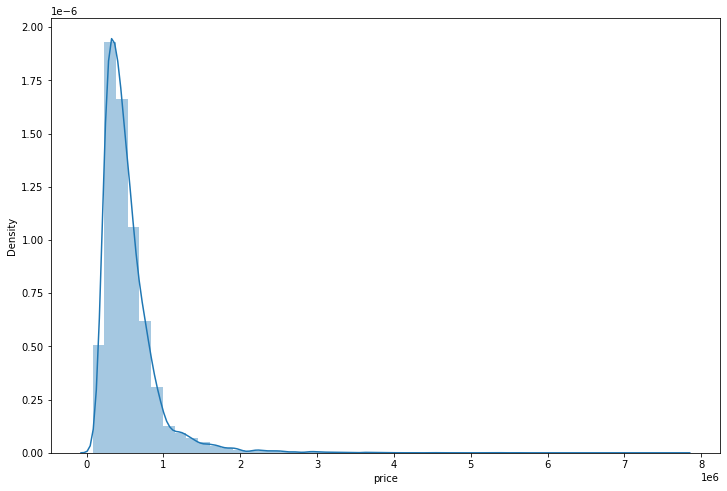

In [6]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

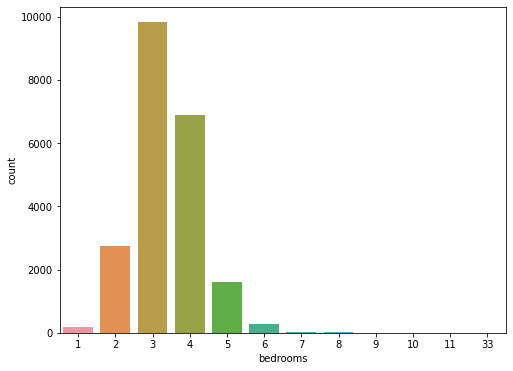

In [7]:
plt.figure(figsize = (8,6))
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='long'>

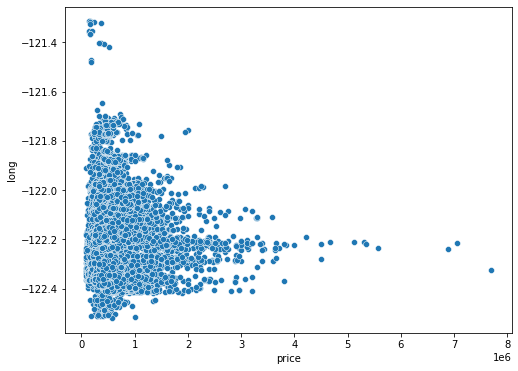

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['price'] , y = df['long'] , data = df)

<AxesSubplot:xlabel='price', ylabel='lat'>

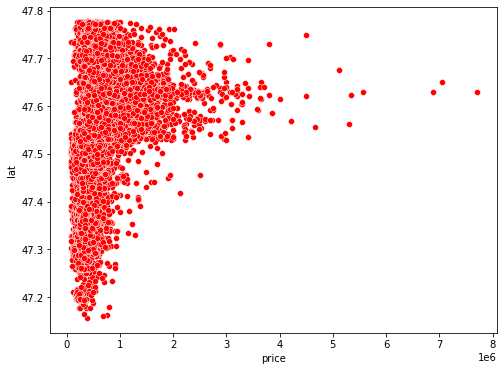

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['price'] , y = df['lat'] , data = df , color = 'r')

<AxesSubplot:xlabel='long', ylabel='sqft_living15'>

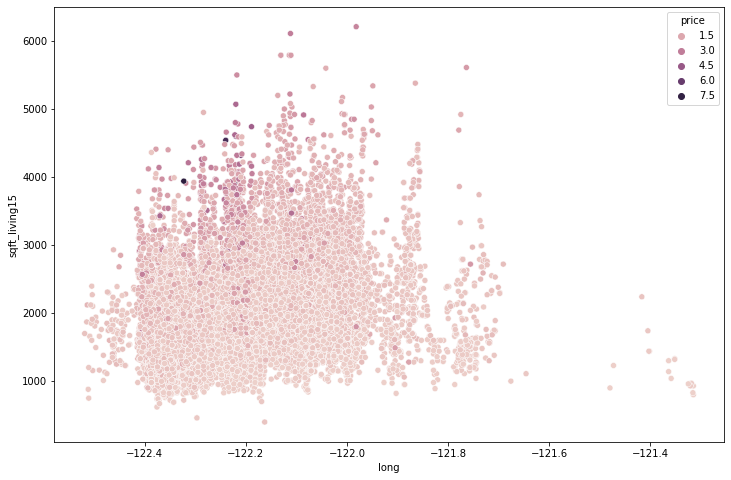

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df['long'] , y = df['sqft_living15'] , data = df , hue = df['price'] )

In [11]:
pd.DataFrame(df.groupby('grade')['price'].sum())

,price
grade,
3,2.620000e+05
4,5.724050e+06
5,6.014280e+07
6,6.153060e+08
7,3.612884e+09
8,3.293215e+09
9,2.023325e+09
10,1.216042e+09
11,5.976192e+08


<AxesSubplot:xlabel='grade', ylabel='count'>

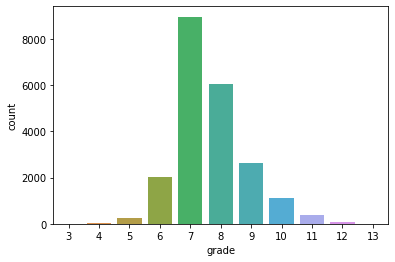

In [12]:
sns.countplot(df['grade'])

In [13]:
df.drop('id', axis = 1 , inplace = True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df['month'] = df['date'].apply(lambda date : date.month)

In [16]:
df['year'] = df['date'].apply(lambda date : date.year)

In [17]:
df.groupby('month')['price'].mean()

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

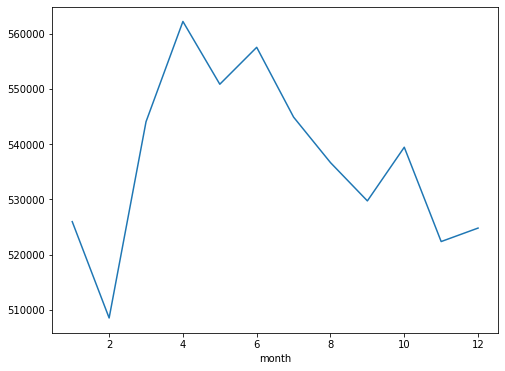

In [18]:
plt.figure(figsize = (8,6))
df.groupby('month')['price'].mean().plot()

<AxesSubplot:xlabel='year', ylabel='count'>

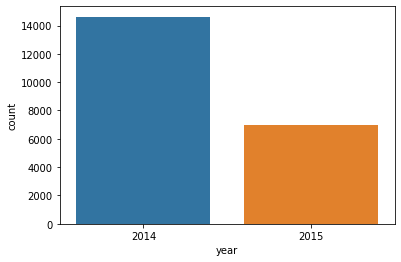

In [19]:
sns.countplot(df['year'])

In [20]:
df.drop('date' , axis = 1 , inplace = True)
df.drop('zipcode' , axis = 1 , inplace = True)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [21]:
x = df.drop('price' , axis = 1)
y = df['price']

In [22]:
xtrain , xtest , ytrain , ytest = train_test_split(x, y, test_size = 0.3 , random_state = 101)

In [23]:
scaler = MinMaxScaler()

In [24]:
xtrain = scaler.fit_transform(xtrain)

In [25]:
xtest = scaler.transform(xtest)

In [26]:
xtrain.shape

(15117, 19)

In [27]:
xtest.shape

(6480, 19)

In [28]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [29]:
model.fit(x=xtrain,y=ytrain.values,
          validation_data=(xtest,ytest.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 430218641408.0000 - val_loss: 418784083968.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 427206836224.0000 - val_loss: 408305008640.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 387504177152.0000 - val_loss: 322094825472.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 238692728832.0000 - val_loss: 138064805888.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 109819928576.0000 - val_loss: 95366307840.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 97593368576.0000 - val_loss: 93500252160.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 95550963712.0000 - val_loss: 91622506496.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 93513089024.0000 - val_loss: 89619431424.0000
Epoch 9/400
119/119 [==

119/119 [==============================] - 0s 2ms/step - loss: 35740430336.0000 - val_loss: 34591219712.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 35676585984.0000 - val_loss: 34308212736.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 35504738304.0000 - val_loss: 34266945536.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 35372367872.0000 - val_loss: 34159644672.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 35354845184.0000 - val_loss: 33985658880.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 35152478208.0000 - val_loss: 33951717376.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 35086118912.0000 - val_loss: 33791883264.0000
Epoch 75/400
119/119 [==============================] - ETA: 0s - loss: 34686377984.000 - 0s 2ms/step - loss: 34990673920.0000 - val_loss: 33669666816.0000
Epo

119/119 [==============================] - 0s 2ms/step - loss: 32170686464.0000 - val_loss: 30551476224.0000
Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32144748544.0000 - val_loss: 30510075904.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32104675328.0000 - val_loss: 30481549312.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32058886144.0000 - val_loss: 30456086528.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32090429440.0000 - val_loss: 30498013184.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32099584000.0000 - val_loss: 30384465920.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32023152640.0000 - val_loss: 30364246016.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 31990165504.0000 - val_loss: 30431877120.0000
Epoch 142/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30948665344.0000 - val_loss: 29085775872.0000
Epoch 201/400
119/119 [==============================] - 0s 3ms/step - loss: 30917969920.0000 - val_loss: 29001836544.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 30868117504.0000 - val_loss: 28944400384.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 30892646400.0000 - val_loss: 28921473024.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 30856157184.0000 - val_loss: 28910653440.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 30879676416.0000 - val_loss: 28911839232.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 30806323200.0000 - val_loss: 28969627648.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 30863267840.0000 - val_loss: 28913905664.0000
Epoch 208/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30128838656.0000 - val_loss: 28052721664.0000
Epoch 267/400
119/119 [==============================] - 0s 2ms/step - loss: 30134147072.0000 - val_loss: 28204957696.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30150365184.0000 - val_loss: 28097648640.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30114844672.0000 - val_loss: 28043354112.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30106804224.0000 - val_loss: 28005208064.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30093780992.0000 - val_loss: 28053118976.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30095011840.0000 - val_loss: 28007931904.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30084157440.0000 - val_loss: 28060852224.0000
Epoch 274/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29427791872.0000 - val_loss: 27328081920.0000
Epoch 333/400
119/119 [==============================] - 0s 2ms/step - loss: 29485873152.0000 - val_loss: 27237101568.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 29423654912.0000 - val_loss: 27118004224.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 29395243008.0000 - val_loss: 27082600448.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 29419380736.0000 - val_loss: 27051343872.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 29386848256.0000 - val_loss: 27027617792.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 29356206080.0000 - val_loss: 27080660992.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 29388670976.0000 - val_loss: 27025391616.0000
Epoch 340/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28709236736.0000 - val_loss: 26375913472.0000
Epoch 399/400
119/119 [==============================] - 0s 2ms/step - loss: 28734568448.0000 - val_loss: 26283995136.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 28724785152.0000 - val_loss: 26290518016.0000


In [30]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

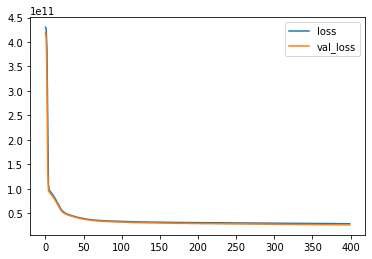

In [31]:
losses.plot()

In [32]:
predictions = model.predict(xtest)

In [33]:
mean_absolute_error(ytest,predictions)

100349.58001302084

In [34]:
np.sqrt(mean_squared_error(ytest,predictions))

162143.5177651628

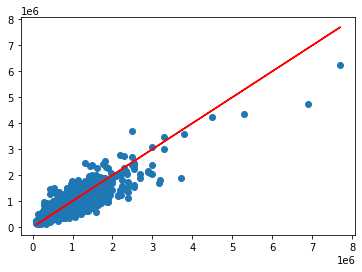

In [35]:
# Our predictions
plt.scatter(ytest,predictions)

# Perfect predictions
plt.plot(ytest,ytest,'r')

In [36]:
errors = ytest.values.reshape(6480, 1) - predictions

<AxesSubplot:ylabel='Density'>

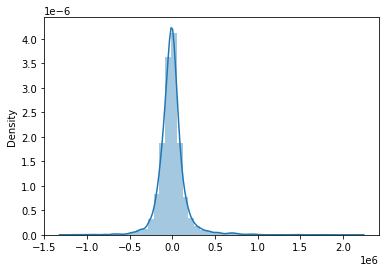

In [37]:
sns.distplot(errors)

In [38]:
single_house = df.drop('price',axis=1).iloc[0]

In [39]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [40]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [41]:
model.predict(single_house)

array([[281658.3]], dtype=float32)

In [42]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64